<a href="https://colab.research.google.com/github/dnjswnsthd/bnk_py/blob/develop/1_ML_AtoZ_KNN_lab_isol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Machine Learning A to Z with KNN</h1>

# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import make_classification, load_iris, load_breast_cancer, load_digits
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, classification_report,precision_score, recall_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import  train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

# KNN 무작위수 분류

## `np.random.randint()`
* `np.random.randint()`로 무작위수 25x2를 생성
* 무작위수를 kNN으로 학습
* 새로운 무작위수 1x2를 만들어서 kNN으로 분류

(50, 2)


,x1,x2,y
0,179,179,1.0
1,20,106,0.0
2,19,4,0.0
3,111,92,1.0
4,101,19,0.0
5,153,116,1.0
6,161,144,1.0
7,131,107,1.0
8,16,99,0.0
9,96,81,0.0


[1.]


Text(84, 114, 'blue')

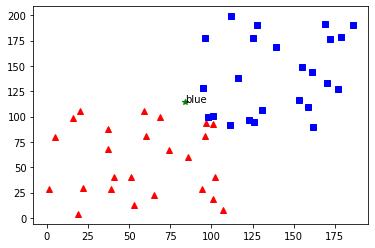

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.utils import shuffle

#np.random.seed(0)
red = np.random.randint(0, 110, (25, 2))  #0
blue = np.random.randint(90, 200, (25, 2))  #1
X = np.vstack((red, blue))
print(X.shape)
y = np.zeros((50,))
y[25:] = 1 # 0:red, 1:blue

X, y = shuffle(X, y, random_state=0)
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y
display(df)

plt.plot(X[y==0, 0], X[y==0, 1], 'r^')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs')

newb = np.random.randint(0, 200, (1, 2))
plt.plot(newb[0,0], newb[0,1], 'g*')

knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred =knn.predict(newb)
print(y_pred)
plt.annotate('red' if y_pred==0 else 'blue', xy=newb[0])

##  `make_classification()`

> 들여쓴 블록


* make_classification() : 분류 모델에 적합한 임의의 데이터 생성 함수
  * n_samples=100 : 표본 데이터 수(건수)
  * n_features=20 : 독립 변수의 수(X 갯수)
  * n_informative=2 : 독립 변수 중 종속 변수와 상관관계가 있는 성분 수
  * n_redundant=2 : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
  * n_repeated=0 : 독립 변수 중 단순 중복된 성분의 수
  * n_classes=2 : 종속 변수의 클래스 수
  * n_clusters_per_class=2: 클래스 당 클러스터의 수
  * weights=None : 클래스 당 표본 수 비율, 예) (0.3, 0.7) 
  * flip_y=0.01 : 클래스가 임의로 교환되는 샘플의 비율, 노이즈 생성 
  * random_state : random seed 

* sklean의 make_classficiation()함수로 변경해서 실습
* `X, y = make_classification(n_samples=50, n_features=2,n_classes=2,  n_redundant=0, random_state=0)`  

[0]


Text(0.6724183753553986, 0.6229617272037272, 'red')

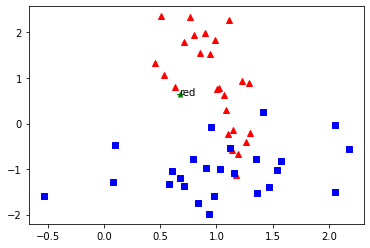

In [ ]:
from sklearn.datasets import make_classification

#np.random.seed(0)
X, y = make_classification(n_samples=50, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
X.shape, y.shape

plt.plot(X[y==0, 0], X[y==0, 1], 'r^')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs')
newb = np.random.randn(1,2)
plt.plot(newb[0, 0], newb[0,1], 'g*')

knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(newb)
print(y_pred)
plt.annotate('red'if y_pred==0 else 'blue', xy=newb[0])

# Iris 품종 분류


## Iris Raw Data, CSV
* `sns.load_dataset('iris')`
* https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [ ]:
file_iris = 'iris.csv'

In [ ]:
# 강사가 파일을 제공한 경우 실행하지 마세요.
import os
url_iris = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
if os.name =='posix':
  !wget -O $file_iris $url_iris
else:
  !pip install wget
  import wget
  wget.download(url_iris, out=file_iris)

--2022-09-19 02:54:19--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2022-09-19 02:54:19 (74.6 MB/s) - ‘iris.csv’ saved [3858/3858]



In [ ]:
iris = pd.read_csv(file_iris)
iris[::20]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
60,5.0,2.0,3.5,1.0,versicolor
80,5.5,2.4,3.8,1.1,versicolor
100,6.3,3.3,6.0,2.5,virginica
120,6.9,3.2,5.7,2.3,virginica
140,6.7,3.1,5.6,2.4,virginica


In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# LabelEncoding
* `sklearn.preprocessing.LabelEncoder`
  * `fit()`
  * `transform()`
  * `fit_transfrom()`
  * `inverse_transform()`
  * `classes_`


In [ ]:
from sklearn.preprocessing import LabelEncoder
data = ['cat', 'dog', 'cow', 'cat', 'cow', 'cow', 'dog']

le = LabelEncoder()
le.fit(data)
print(le.classes_)
code =le.transform(data)
print(code)

le.inverse_transform(code)

['cat' 'cow' 'dog']
[0 2 1 0 1 1 2]


array(['cat', 'dog', 'cow', 'cat', 'cow', 'cow', 'dog'], dtype='<U3')

In [ ]:
le = LabelEncoder()
le.fit(iris['species'])
print(le.classes_)
iris['target'] = le.transform(iris['species'])
iris[::20]

['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
40,5.0,3.5,1.3,0.3,setosa,0
60,5.0,2.0,3.5,1.0,versicolor,1
80,5.5,2.4,3.8,1.1,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2
120,6.9,3.2,5.7,2.3,virginica,2
140,6.7,3.1,5.6,2.4,virginica,2


# 데이타 분할
* `X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)`

In [ ]:
from sklearn.model_selection import  train_test_split

X = np.arange(10)
y = X * X
print('X:', X, 'y:', y)

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=4, shuffle=False)

print('X train:', X_train)
print('X test:', X_test)
print('y train:', y_train)
print('y test:', y_test)

X: [0 1 2 3 4 5 6 7 8 9] y: [ 0  1  4  9 16 25 36 49 64 81]
X train: [0 1 2 3 4 5]
X test: [6 7 8 9]
y train: [ 0  1  4  9 16 25]
y test: [36 49 64 81]


## Iris Raw Data 분류

In [ ]:
from sklearn.model_selection import  train_test_split

feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
X_train, X_test, y_train, y_test = train_test_split(iris[feature_names], iris['target'], random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_test.values, y_pred)
print(np.sum(y_test.values == y_pred)/y_test.shape[0])
np.mean(y_test == y_pred)

(112, 4) (38, 4) (112,) (38,)
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1] [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
0.9736842105263158


0.9736842105263158

# scikit-learn Dataset
* `sklearn.datasets.load_iris()`

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

* type() 

In [ ]:
type(iris)

sklearn.utils.Bunch

* keys()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

* DESCR

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* data

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

* data.shape

In [ ]:
iris.data.shape

(150, 4)

* feature_names

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* target

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* target.shape

In [ ]:
iris.target.shape

(150,)

* target_names

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

* DataFrame으로 생성

In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['speces'] = iris.target_names[iris.target]
df[::20]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,speces
0,5.1,3.5,1.4,0.2,0,setosa
20,5.4,3.4,1.7,0.2,0,setosa
40,5.0,3.5,1.3,0.3,0,setosa
60,5.0,2.0,3.5,1.0,1,versicolor
80,5.5,2.4,3.8,1.1,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
120,6.9,3.2,5.7,2.3,2,virginica
140,6.7,3.1,5.6,2.4,2,virginica


## Iris KNN 품종 분류 실습

* iris 데이타를 knn으로 train 데이터 학습 
* test 데이터 예측
* test accuracy 계산

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'accuracy:{np.mean(y_pred == y_test)}')

(112, 4) (38, 4) (112,) (38,)
accuracy:0.9736842105263158


In [ ]:
knn.predict_proba(X_test)

array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

# 분류 평가 지표

### 정확도(Accuracy)

In [ ]:
np.sum(y_pred==y_test)/y_test.shape[0], knn.score(X_test, y_test), accuracy_score(y_test, y_pred)

(0.9736842105263158, 0.9736842105263158, 0.9736842105263158)

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([1,0,1,1,1,1,1,1,1,1])

print(f'accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%')
print(confusion_matrix(y_true, y_pred))

accuracy: 80.00%
[[0 1]
 [1 8]]


In [ ]:
y_true = np.array([1,0,2,0,1,2,0,1,2,0,2,1])
y_pred = np.array([1,0,2,1,2,1,0,1,2,0,1,1])

print(f'accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%')
print(confusion_matrix(y_true, y_pred))

accuracy: 66.67%
[[3 1 0]
 [0 3 1]
 [0 2 2]]


### 정밀도, 재현율

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_true = np.array([0,0,0,0,0,1,1,1,1,1])
y_pred = np.array([0,0,0,0,1,0,1,1,1,1])

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}')

accuracy:0.8, precision:0.8, recall:0.8


In [ ]:
from sklearn.metrics import f1_score, classification_report

y_true =  [0,0,0,0,0,0,0,0,1,1]
y_pred1 = [0,0,0,0,0,0,1,1,1,1]
y_pred2 = [0,0,0,0,0,0,0,1,0,1]

for y_pred in [y_pred1, y_pred2]:
    print(confusion_matrix(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'accuracy:{accuracy}, precision:{precision},\
                       recall:{recall}, f1: {f1}')
    print(classification_report(y_true, y_pred))

[[6 2]
 [0 2]]
accuracy:0.8, precision:0.5,                       recall:1.0, f1: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.50      1.00      0.67         2

    accuracy                           0.80        10
   macro avg       0.75      0.88      0.76        10
weighted avg       0.90      0.80      0.82        10

[[7 1]
 [1 1]]
accuracy:0.8, precision:0.5,                       recall:0.5, f1: 0.5
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



## ROC, AUC

auc1: 0.875 auc2: 0.6875
[2 1 0] [2 1 0]


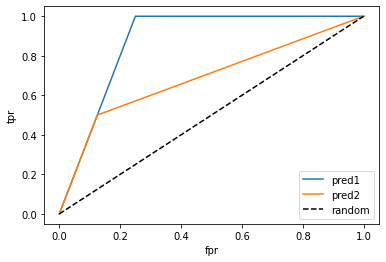

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_true =  [0,0,0,0,0,0,0,0,1,1]
y_pred1 = [0,0,0,0,0,0,1,1,1,1]
y_pred2 = [0,0,0,0,0,0,0,1,0,1]
fpr1, tpr1, thresh1 = roc_curve(y_true, y_pred1)
fpr2, tpr2, thresh2 = roc_curve(y_true, y_pred2)

plt.plot(fpr1, tpr1, label='pred1')
plt.plot(fpr2, tpr2, label='pred2')
plt.plot([0,1],[0,1], 'k--', label='random')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

auc1 = roc_auc_score(y_true, y_pred1)
auc2 = roc_auc_score(y_true, y_pred2)
print('auc1:', auc1, 'auc2:',auc2)
print(thresh1, thresh2)

### 유방암 데이터로 ROC 실습
* `load_breast_cancer()`


In [ ]:
cancer = load_breast_cancer()
print(cancer.keys())

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['class'] = cancer.target_names[cancer.target]
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [ ]:
df['class'].value_counts()

benign       357
malignant    212
Name: class, dtype: int64

acc: 0.9370629370629371 auc: 0.9344863731656184


(array([2, 1, 0]),
 array([0.       , 0.0754717, 1.       ]),
 array([0.        , 0.94444444, 1.        ]))

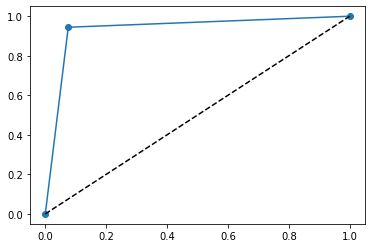

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
fpr, tpr, thresh = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='o')
plt.plot([0,1], [0,1], 'k--')
auc_score = roc_auc_score(y_test, y_pred)
print('acc:', acc, 'auc:', auc_score)
thresh, fpr, tpr

### 예측 확률로 ROC 실습
* `knn.predict_proba(X_test)`

[[0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [0.  1. ]]
[0 1 1 1 1]
[2.  1.  0.8 0.6 0.4 0.2 0. ]
0.6


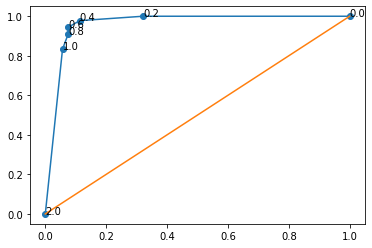

In [ ]:
y_proba = knn.predict_proba(X_test)
print(y_proba[:5])
print(y_test[:5])
fpr, tpr, thresh = roc_curve(y_test, y_proba[:, 1])
plt.plot(fpr, tpr, marker='o')
plt.plot([0,1], [0,1])
print(thresh)

best_idx = np.argmax(tpr-fpr)
best_thresh = thresh[best_idx]
print(best_thresh)

for i, t in enumerate(thresh):
  plt.annotate(t, xy=(fpr[i], tpr[i]))

### Best Threshold
```python
best_idx = np.argmax(tpr - fpr)
best_thresh = thresh[best_idx]
```

thresh [2.  1.  0.8 0.6 0.4 0.2 0. ]
fpr [0.         0.05660377 0.0754717  0.0754717  0.11320755 0.32075472
 1.        ] tpr [0.         0.83333333 0.91111111 0.94444444 0.97777778 1.
 1.        ]
best thresh: 0.6


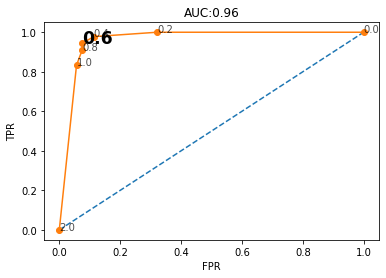

In [ ]:
y_pred2 = np.float32(y_proba[:, 1] >= best_thresh)
y_pred2

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0.], dtype=float32)

In [ ]:
np.all(y_pred == y_pred2)

True

In [ ]:
roc_auc_score(y_test, y_pred), roc_auc_score(y_test, y_pred2)

(0.9344863731656184, 0.9344863731656184)

### Multi-Class ROC

acc: 0.9736842105263158


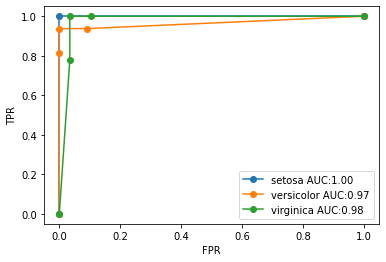

In [ ]:
from sklearn.metrics import auc, roc_curve

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_proba = knn.predict_proba(X_test)
acc = knn.score(X_test, y_test)
print('acc:', acc)

plt.xlabel('FPR');plt.ylabel('TPR')
for i, target_name in enumerate(iris.target_names):
  fpr, tpr, thresh = roc_curve(y_test, y_proba[:, i], pos_label=i)
  score = auc(fpr, tpr)
  plt.plot(fpr, tpr, marker='o', label=f'{target_name} AUC:{score:.2f}')
_ = plt.legend()

# 표준화 정규화

## 임의의 수 표준화 실습
* `[2,8,10]` 
* 표준화 계산
* StandarsScaler 실습

In [ ]:
arr = np.array([2,8,10], dtype=np.float32).reshape(-1,1)
print(f'mean: {arr.mean()}, var: {arr.var()}, std : {arr.std()}')
print((arr - arr.mean()) / arr.std())

std_scaler = StandardScaler()
std_scaler.fit(arr)
print(std_scaler.mean_, std_scaler.var_)
std_scaler.transform(arr)

mean: 6.666666507720947, var: 11.555556297302246, std : 3.399346351623535
[[-1.3728129 ]
 [ 0.39223233]
 [ 0.98058075]]
[6.66666667] [11.55555556]


array([[-1.3728129 ],
       [ 0.39223227],
       [ 0.9805806 ]], dtype=float32)

In [ ]:
StandardScaler().fit_transform(arr)
#scaler.mean_, scaler.var_

array([[-1.3728129 ],
       [ 0.39223227],
       [ 0.9805806 ]], dtype=float32)

## Iris 데이터 표준화 실습
* iris 0,1 feature 표준화 및 시각화

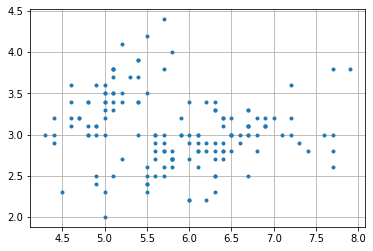

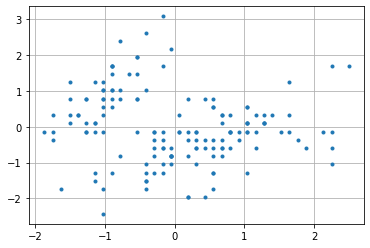

In [ ]:
iris = load_iris()
data = iris.data

plt.plot(data[:, 0], data[:,1], '.')
plt.grid()
plt.show()

scaled = StandardScaler().fit_transform(data)
plt.plot(scaled[:, 0], scaled[:, 1], '.')
plt.grid()

## 표준화의 필요성

* `x = np.load('standard.npy')`
* `y = np.concatenate((np.ones(35), np.zeros(14)))`

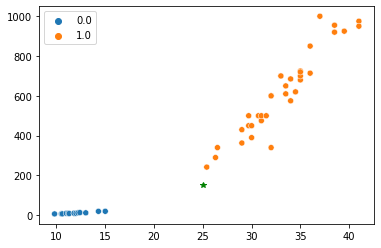

In [ ]:

x = np.array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  11.8,    9.9],
       [  12. ,    9.8],
       [  12.2,   12.2],
       [  12.4,   13.4],
       [  13. ,   12.2],
       [  14.3,   19.7],
       [  15. ,   19.9]])
       
y = np.concatenate((np.ones(35), np.zeros(14)))
newb = np.array([[25, 150]])
 
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.plot(newb[0,0], newb[0,1], 'g*')

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x, y)
print(knn.score(x, y))

knn.predict(newb)

1.0


array([0.])

In [ ]:
dist, idx = knn.kneighbors(newb)
dist, idx

(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.32150953]]), array([[ 0, 48, 47, 45, 46]]))

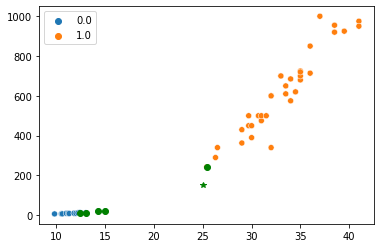

In [ ]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.plot(newb[0,0], newb[0,1], 'g*')
_ = plt.plot(x[idx,0], x[idx,1], 'go')

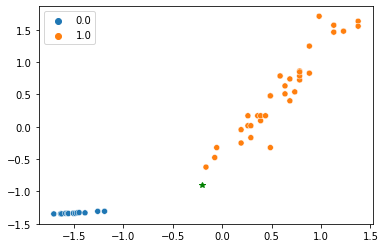

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(x)
x_t = std.transform(x)

sns.scatterplot(x=x_t[:, 0], y=x_t[:, 1], hue=y)
newb_t = std.transform(newb)
plt.plot(newb_t[0,0], newb_t[0,1], 'g*')

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(x_t, y)
knn2.predict(newb_t)

array([1.])

## MinMaxScaler

* `[2,8,10]` 
* min max 정규화 계산
* MinMaxScaler 사용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

arr = np.array([2,8,10], dtype=np.float32).reshape(-1,1)
print(f"before:{arr}")

print((arr - np.min(arr))/ (np.max(arr) - np.min(arr)))

mm_scaler = MinMaxScaler()
mm_scaler.fit(arr)
mm_scaler.data_max_, mm_scaler.data_min_
print(mm_scaler.transform(arr))

before:[[ 2.]
 [ 8.]
 [10.]]
[[0.  ]
 [0.75]
 [1.  ]]
[[0.  ]
 [0.75]
 [1.  ]]


In [ ]:
mm_scaler.transform(np.array([1,8, 20], dtype=np.float32).reshape(-1,1))


array([[-0.125],
       [ 0.75 ],
       [ 2.25 ]], dtype=float32)

* iris 0,1 feature 정규화 및 시각화

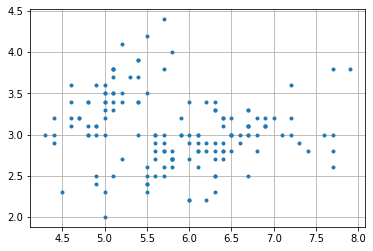

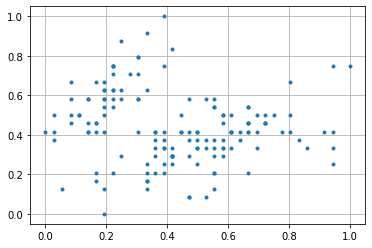

In [ ]:
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
data = iris.data
plt.plot(data[:, 0], data[:, 1], '.')
plt.grid()
plt.show()

scaled = MinMaxScaler().fit_transform(data)
plt.plot(scaled[:, 0], scaled[:, 1], '.')
plt.grid()
plt.show()


## Iris 표준화 후 kNN 분류 실습

* iris 데이터 표준화 후 학습 및 평가

In [ ]:
iris = load_iris()
scaler = StandardScaler()
scaler.fit(iris.data)
scaled = scaler.transform(iris.data)

X_train, X_test, y_train, y_test = train_test_split(scaled, iris.target, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
print('acc:', acc)

acc: 0.9736842105263158


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)

#scaler = StandardScaler() # 절대 금지
#scaler.fit(X_test) # 절대금지
scaled_test = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(scaled_train, y_train)
acc = knn.score(scaled_test, y_test)
print('acc:', acc)

acc: 0.9736842105263158


## Pipeline
* `sklearn.pipeline.Pipeline`


In [ ]:
from sklearn.pipeline import Pipeline

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

pipe = Pipeline([('std',StandardScaler()),('knn', KNeighborsClassifier())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = pipe.score(X_test, y_test)
print('acc:', acc)

acc: 0.9736842105263158


In [ ]:
pipe.steps

[('std', StandardScaler()), ('knn', KNeighborsClassifier())]

In [ ]:
pipe.named_steps

{'std': StandardScaler(), 'knn': KNeighborsClassifier()}

In [ ]:
pipe[1], pipe['knn']

(KNeighborsClassifier(), KNeighborsClassifier())

In [ ]:
pipe.set_params(knn__n_neighbors=1)

Pipeline(steps=[('std', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

# 손글씨 숫자 분류
* `load_digits()`

(1797, 64) (1797,)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
16.0 0.0


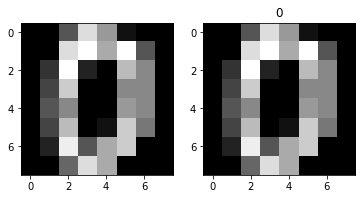

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
#print(digits.DESCR)
print(digits.data.shape, digits.target.shape)

img = digits.data[0]
plt.subplot(1,2,1)
plt.imshow(img.reshape(8,8), cmap='gray')

print(digits.keys())
print(digits.images.shape)

plt.subplot(1,2,2)
plt.imshow(digits.images[0], cmap='gray')
plt.title(digits.target[0])
print(digits.data.max(), digits.data.min())

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo


* 첫 번째 숫자만 **표시**

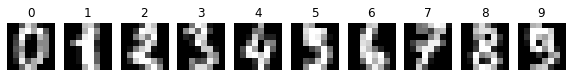

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
  dimg = digits.images[digits.target==i][0]
  plt.subplot(1,10, i+1)
  plt.imshow(dimg, cmap='gray')
  plt.title(i)
  plt.axis('off')

* 훈련 세트와 테스트 세트 분류
* `n_neighbors`를 1~11로 변경하면서 학습 및 평가

In [ ]:
mm = MinMaxScaler()
X = mm.fit_transform(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, digits.target,)
                                                    #random_state=3)
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print(f'k={k}, accuracy={score*100:.2f}%')

k=1, accuracy=98.00%
k=2, accuracy=96.44%
k=3, accuracy=97.56%
k=4, accuracy=97.11%
k=5, accuracy=97.11%
k=6, accuracy=96.89%
k=7, accuracy=96.67%
k=8, accuracy=96.22%
k=9, accuracy=96.44%
k=10, accuracy=96.00%


# 교차 검증(Cross Validation)


## KFold
* `np.arange(0.0, 1.5, 0.1)`를 `KFold(3)`으로 분할

In [ ]:
from sklearn.model_selection import KFold

x = np.arange(0.0, 1.5, 0.1)
kfold = KFold(3, shuffle=True)
for train, test in kfold.split(x):
  print('train idx:', train, 'test idx:', test)
  print('train value:', x[train], 'test value:', x[test])

train idx: [ 0  2  3  5  6  7  8  9 10 12] test idx: [ 1  4 11 13 14]
train value: [0.  0.2 0.3 0.5 0.6 0.7 0.8 0.9 1.  1.2] test value: [0.1 0.4 1.1 1.3 1.4]
train idx: [ 1  4  5  6  9 10 11 12 13 14] test idx: [0 2 3 7 8]
train value: [0.1 0.4 0.5 0.6 0.9 1.  1.1 1.2 1.3 1.4] test value: [0.  0.2 0.3 0.7 0.8]
train idx: [ 0  1  2  3  4  7  8 11 13 14] test idx: [ 5  6  9 10 12]
train value: [0.  0.1 0.2 0.3 0.4 0.7 0.8 1.1 1.3 1.4] test value: [0.5 0.6 0.9 1.  1.2]


* `np.arange(0.0, 1.5, 0.1)`를 KFold(3, shuffle=True)으로 분할
* y는 0,1 비율이 10:5로 생성

In [ ]:
x = np.arange(0.0, 1.5, 0.1)
y = np.zeros(15)
y[10:] = 1

kfold = KFold(3, shuffle=True)
for train, test in kfold.split(x):
  print(y[train], y[test])

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.] [0. 0. 0. 1. 1.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] [0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.] [0. 0. 1. 1. 1.]


* `np.arange(0.0, 1.5, 0.1)`를 StratifiedKFold(5, shuffle=True)으로 분할
* y는 0,1 비율이 10:5로 생성

In [ ]:
from sklearn.model_selection import StratifiedKFold
 
x = np.arange(0.0, 1.5, 0.1)
y = np.zeros(15)
y[10:] = 1

skfold = StratifiedKFold(5)
for train, test in skfold.split(x, y):
  print(y[train], y[test])


[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]


## 손글씨 data KFold(5)로 kNN 학습 및 평가

In [ ]:
digits = load_digits()
kfold = KFold(n_splits=5)

knn = KNeighborsClassifier(n_neighbors=1)
cv_acc = np.array([])

for i, (train_idx, test_idx) in enumerate(kfold.split(digits.data)):
  X_train, X_test = digits.data[train_idx], digits.data[test_idx]
  y_train, y_test = digits.target[train_idx], digits.target[test_idx]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  cv_acc = np.append(cv_acc, acc)

print(f'acc scores:{cv_acc}')
print(f'mean acc:{cv_acc.mean()}')


acc scores:[0.96111111 0.95277778 0.96657382 0.98885794 0.95543175]
mean acc:0.9649504797276384


In [ ]:
digits = load_digits()
kfold = KFold(n_splits=5)

for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)
  cv_acc = np.array([])

  for i, (train_idx, test_idx) in enumerate(kfold.split(digits.data)):
    X_train, X_test = digits.data[train_idx], digits.data[test_idx]
    y_train, y_test = digits.target[train_idx], digits.target[test_idx]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cv_acc = np.append(cv_acc, acc)

  print(f'k={k} acc scores:{cv_acc}')
  print(f'k={k} mean acc:{cv_acc.mean()}')

k=1 acc scores:[0.96111111 0.95277778 0.96657382 0.98885794 0.95543175]
k=1 mean acc:0.9649504797276384
k=2 acc scores:[0.96388889 0.96666667 0.96935933 0.97771588 0.9637883 ]
k=2 mean acc:0.9682838130609719
k=3 acc scores:[0.95555556 0.96111111 0.9637883  0.98607242 0.96657382]
k=3 mean acc:0.9666202414113277
k=4 acc scores:[0.95       0.96111111 0.9637883  0.98050139 0.96657382]
k=4 mean acc:0.964394924172083
k=5 acc scores:[0.95       0.96388889 0.9637883  0.98328691 0.9637883 ]
k=5 mean acc:0.9649504797276384
k=6 acc scores:[0.95       0.96388889 0.9637883  0.97493036 0.95264624]
k=6 mean acc:0.9610507582791705
k=7 acc scores:[0.93888889 0.96388889 0.96657382 0.97771588 0.95264624]
k=7 mean acc:0.9599427421850819
k=8 acc scores:[0.94166667 0.96388889 0.96657382 0.97493036 0.94986072]
k=8 mean acc:0.9593840916125039
k=9 acc scores:[0.93611111 0.95555556 0.96935933 0.97493036 0.94986072]
k=9 mean acc:0.9571634168987929
k=10 acc scores:[0.93888889 0.95277778 0.96657382 0.97493036 0.94


## `cross_val_score(estimator, X, y, groups, scoring, cv)`
* scoring : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, digits.data, digits.target, cv=5)
print(f'acc:{scores}')
print(f'mean acc:{scores.mean()}')

acc:[0.96111111 0.95277778 0.96657382 0.98607242 0.95543175]
mean acc:0.9643933766635715


In [ ]:
cross_validate(knn, digits.data, digits.target, cv=5)

{'fit_time': array([0.00131822, 0.00154161, 0.00139952, 0.00134754, 0.0025413 ]),
 'score_time': array([0.02734184, 0.02344871, 0.02285171, 0.02290416, 0.02253938]),
 'test_score': array([0.96111111, 0.95277778, 0.96657382, 0.98607242, 0.95543175])}

In [ ]:
best = (0,0)
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)

  scores = cross_val_score(knn, digits.data, digits.target, cv=5)
  print(f'acc:{scores}')
  print(f'mean acc:{scores.mean()}')
  if best[1] < scores.mean():
    best = (k, scores.mean())
print(f'best k:{best[0]}, mean acc:{best[1]}')

acc:[0.96111111 0.95277778 0.96657382 0.98607242 0.95543175]
mean acc:0.9643933766635715
acc:[0.96111111 0.96666667 0.96935933 0.97771588 0.96100279]
mean acc:0.9671711544413494
acc:[0.95555556 0.95833333 0.96657382 0.98607242 0.96657382]
mean acc:0.966621788919839
acc:[0.94722222 0.95833333 0.96657382 0.98050139 0.96657382]
mean acc:0.9638409161250386
acc:[0.94722222 0.95555556 0.96657382 0.98050139 0.9637883 ]
mean acc:0.9627282575054161
acc:[0.94444444 0.95833333 0.96657382 0.97493036 0.95264624]
mean acc:0.9593856391210152
acc:[0.93611111 0.96111111 0.96935933 0.98050139 0.95264624]
mean acc:0.9599458372021046
acc:[0.93611111 0.95833333 0.96935933 0.97771588 0.94986072]
mean acc:0.9582760755184154
acc:[0.93055556 0.95277778 0.97214485 0.97771588 0.94986072]
mean acc:0.9566109563602601
acc:[0.93055556 0.94722222 0.96935933 0.97771588 0.94986072]
mean acc:0.954942742185082
best k:2, mean acc:0.9671711544413494


# GridSearchCV

* GridSearchCV, knn으로 최적의 n_neighbors 찾기

In [ ]:
knn = KNeighborsClassifier()
gcv = GridSearchCV(knn, {'n_neighbors':range(1, 11)}, cv=KFold(5, shuffle=True))
gcv.fit(digits.data, digits.target)
#print(gcv.cv_results_)
display(pd.DataFrame(gcv.cv_results_))
print(gcv.best_params_)
gcv.best_estimator_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001393,0.000038,0.024755,0.002543,1,{'n_neighbors': 1},0.986111,0.983333,1.000000,0.983287,0.988858,0.988318,0.006193,1
1,0.001439,0.000124,0.025103,0.000537,2,{'n_neighbors': 2},0.983333,0.980556,0.991643,0.980501,0.991643,0.985535,0.005091,4
2,0.001366,0.000028,0.026468,0.000506,3,{'n_neighbors': 3},0.988889,0.983333,0.997214,0.983287,0.988858,0.988316,0.005098,2
3,0.001461,0.000149,0.030181,0.001571,4,{'n_neighbors': 4},0.988889,0.977778,0.994429,0.977716,0.986072,0.984977,0.006487,5
4,0.001389,0.000019,0.034311,0.010134,5,{'n_neighbors': 5},0.991667,0.977778,0.994429,0.980501,0.988858,0.986647,0.006435,3
5,0.001470,0.000241,0.030757,0.003707,6,{'n_neighbors': 6},0.991667,0.975000,0.988858,0.977716,0.986072,0.983863,0.006435,6
6,0.001361,0.000022,0.030867,0.004092,7,{'n_neighbors': 7},0.988889,0.975000,0.991643,0.977716,0.983287,0.983307,0.006339,8
7,0.001798,0.000798,0.031524,0.006191,8,{'n_neighbors': 8},0.983333,0.975000,0.991643,0.983287,0.980501,0.982753,0.005382,9
8,0.001368,0.000025,0.031609,0.003690,9,{'n_neighbors': 9},0.986111,0.975000,0.991643,0.983287,0.980501,0.983309,0.005554,7
9,0.001377,0.000037,0.029024,0.000556,10,{'n_neighbors': 10},0.980556,0.977778,0.988858,0.986072,0.980501,0.982753,0.004073,9


{'n_neighbors': 1}


KNeighborsClassifier(n_neighbors=1)

## Train, Test, Validation Set

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
gcv = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(1, 11), 'weights':['uniform', 'distance']}, cv=5)
gcv.fit(X_train, y_train)
display(pd.DataFrame(gcv.cv_results_))
print('best param:', gcv.best_params_)

estimator = gcv.best_estimator_
acc = estimator.score(X_test, y_test)
print('test acc:', acc)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001382,0.000147,0.018629,0.002655,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.970370,0.985185,0.988848,0.988848,0.988848,0.984420,0.007166,5
1,0.001305,0.000085,0.015634,0.002449,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.970370,0.985185,0.988848,0.988848,0.988848,0.984420,0.007166,5
2,0.002415,0.002378,0.033727,0.004415,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.970370,0.977778,0.985130,0.985130,0.977695,0.979221,0.005524,19
3,0.003272,0.003955,0.013621,0.003989,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.970370,0.985185,0.988848,0.988848,0.988848,0.984420,0.007166,5
4,0.002226,0.001908,0.022330,0.002049,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.985185,0.988889,0.985130,0.985130,0.985130,0.985893,0.001498,3
5,0.003344,0.004057,0.014957,0.003929,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.985185,0.992593,0.985130,0.985130,0.985130,0.986634,0.002980,1
6,0.001334,0.000121,0.031635,0.009541,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.981481,0.996296,0.977695,0.981413,0.981413,0.983660,0.006482,12
7,0.002962,0.003367,0.021762,0.002869,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.985185,0.996296,0.981413,0.985130,0.985130,0.986631,0.005045,2
8,0.002382,0.002043,0.042695,0.001670,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.985185,0.996296,0.973978,0.985130,0.985130,0.985144,0.007058,4
9,0.002667,0.002852,0.014643,0.002942,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.985185,0.996296,0.973978,0.985130,0.981413,0.984400,0.007214,9


best param: {'n_neighbors': 3, 'weights': 'distance'}
test acc: 0.9888888888888889


## Pipeline + GridSearch
* Minmax Scaler

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
mm_scaler = MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('scaler',mm_scaler),('knn', knn)])
gcv = GridSearchCV(pipe, {'knn__n_neighbors': range(1, 11), 'knn__weights':['uniform', 'distance']}, cv=5)
gcv.fit(X_train, y_train)
display(pd.DataFrame(gcv.cv_results_))
print('best param:', gcv.best_params_)
print('test acc:', gcv.score(X_test, y_test))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003291,0.000697,0.018488,0.001911,1,uniform,"{'knn__n_neighbors': 1, 'knn__weights': 'unifo...",0.974074,0.985185,0.988848,0.988848,0.985130,0.984417,0.005428,5
1,0.003125,0.000355,0.007858,0.000448,1,distance,"{'knn__n_neighbors': 1, 'knn__weights': 'dista...",0.974074,0.985185,0.988848,0.988848,0.985130,0.984417,0.005428,5
2,0.002847,0.000082,0.019461,0.001969,2,uniform,"{'knn__n_neighbors': 2, 'knn__weights': 'unifo...",0.977778,0.977778,0.985130,0.985130,0.977695,0.980702,0.003616,17
3,0.002785,0.000052,0.008606,0.000186,2,distance,"{'knn__n_neighbors': 2, 'knn__weights': 'dista...",0.974074,0.985185,0.988848,0.988848,0.985130,0.984417,0.005428,5
4,0.002908,0.000256,0.019299,0.001828,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.985185,0.988889,0.985130,0.985130,0.981413,0.985149,0.002364,3
5,0.002844,0.000250,0.009828,0.000741,3,distance,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.985185,0.992593,0.985130,0.985130,0.981413,0.985890,0.003650,2
6,0.002949,0.000131,0.022944,0.001913,4,uniform,"{'knn__n_neighbors': 4, 'knn__weights': 'unifo...",0.981481,0.992593,0.977695,0.981413,0.977695,0.982175,0.005472,14
7,0.002822,0.000098,0.010939,0.000277,4,distance,"{'knn__n_neighbors': 4, 'knn__weights': 'dista...",0.985185,0.996296,0.981413,0.985130,0.985130,0.986631,0.005045,1
8,0.002737,0.000034,0.020103,0.000489,5,uniform,"{'knn__n_neighbors': 5, 'knn__weights': 'unifo...",0.988889,0.992593,0.973978,0.985130,0.985130,0.985144,0.006232,4
9,0.002847,0.000099,0.011427,0.000592,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.988889,0.992593,0.973978,0.985130,0.981413,0.984400,0.006409,8


best param: {'knn__n_neighbors': 4, 'knn__weights': 'distance'}
test acc: 0.9866666666666667


In [ ]:
estimator = gcv.best_estimator_
estimator.score(X_test, y_test)

0.9866666666666667

# RandomizeSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
mm_scaler = MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('scaler',mm_scaler),('knn', knn)])
gcv = RandomizedSearchCV(pipe, {'knn__n_neighbors': range(1, 11), 'knn__weights':['uniform', 'distance']}, cv=5, n_iter=5)
gcv.fit(X_train, y_train)
display(pd.DataFrame(gcv.cv_results_))
print('best param:', gcv.best_params_)
print('test acc:', gcv.score(X_test, y_test))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__weights,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013277,0.003208,0.048263,0.003104,distance,6,"{'knn__weights': 'distance', 'knn__n_neighbors...",0.981481,0.996296,0.973978,0.985130,0.981413,0.983660,0.007285,4
1,0.013453,0.003772,0.048652,0.001058,distance,4,"{'knn__weights': 'distance', 'knn__n_neighbors...",0.985185,0.996296,0.981413,0.985130,0.985130,0.986631,0.005045,1
2,0.011838,0.005966,0.067436,0.008249,uniform,9,"{'knn__weights': 'uniform', 'knn__n_neighbors'...",0.974074,0.988889,0.970260,0.981413,0.985130,0.979953,0.006889,5
3,0.011942,0.005318,0.054245,0.013873,uniform,3,"{'knn__weights': 'uniform', 'knn__n_neighbors'...",0.985185,0.988889,0.985130,0.985130,0.981413,0.985149,0.002364,2
4,0.004456,0.002253,0.015451,0.004781,distance,7,"{'knn__weights': 'distance', 'knn__n_neighbors...",0.981481,0.988889,0.973978,0.985130,0.988848,0.983665,0.005566,3


best param: {'knn__weights': 'distance', 'knn__n_neighbors': 4}
test acc: 0.9866666666666667


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003295,0.000334,0.021785,0.001627,5,{'knn__n_neighbors': 5},0.988889,0.992593,0.973978,0.985130,0.985130,0.985144,0.006232,2
1,0.003090,0.000069,0.018868,0.000498,3,{'knn__n_neighbors': 3},0.985185,0.988889,0.985130,0.985130,0.981413,0.985149,0.002364,1
2,0.003359,0.000933,0.016116,0.000181,1,{'knn__n_neighbors': 1},0.974074,0.985185,0.988848,0.988848,0.985130,0.984417,0.005428,3
3,0.002866,0.000118,0.020095,0.000260,10,{'knn__n_neighbors': 10},0.977778,0.988889,0.973978,0.981413,0.985130,0.981437,0.005257,4
4,0.003101,0.000474,0.023444,0.005168,17,{'knn__n_neighbors': 17},0.970370,0.970370,0.966543,0.962825,0.970260,0.968074,0.003007,9
5,0.003107,0.000722,0.020672,0.000962,16,{'knn__n_neighbors': 16},0.970370,0.970370,0.966543,0.966543,0.977695,0.970304,0.004073,7
6,0.002794,0.000107,0.020404,0.000261,12,{'knn__n_neighbors': 12},0.974074,0.981481,0.973978,0.981413,0.985130,0.979215,0.004446,5
7,0.003303,0.000728,0.022609,0.003014,13,{'knn__n_neighbors': 13},0.977778,0.981481,0.973978,0.977695,0.973978,0.976982,0.002809,6
8,0.002840,0.000046,0.020891,0.001474,20,{'knn__n_neighbors': 20},0.959259,0.970370,0.962825,0.970260,0.973978,0.967339,0.005430,10
9,0.002891,0.000117,0.020593,0.000882,18,{'knn__n_neighbors': 18},0.966667,0.970370,0.962825,0.966543,0.977695,0.968820,0.005038,8


best param: {'knn__n_neighbors': 3}
Test acc: 0.9888888888888889


In [ ]:
estimator

Pipeline(steps=[('mm_scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

# 모델 저장 및 복원

* 최적의 모델 저장
 *  `model.dat`

In [ ]:
import pickle

with open('model.dat', 'wb') as f:
  pickle.dump(estimator, f)


In [ ]:
with open('model.dat', 'rb') as f:
  model = pickle.load(f)

model.score(X_test, y_test)

0.9866666666666667

### 손으로 쓴 숫자 인식하기
* 온라인 그림판 : https://sketch.io/sketchpad/
* 샘플 숫자 이미지 다운로드 :  0458.png

In [ ]:
#강사가 파일을 제공한 경우 실행하지 마세요.
import os
file_0458 = '0458.png'
#url_0458 = 'https://www.dropbox.com/s/yvzxeut7um2aeng/0458.png?dl=1'
url_0458 = 'https://share.sketchpad.app/22/5b7-417a-0da9f1.png'
if os.name =='posix':
  !wget -O $file_0458 $url_0458
else:
  !pip install wget
  import wget
  wget.download(url_0458, out=file_0458)

--2022-09-20 03:39:27--  https://share.sketchpad.app/22/5b7-417a-0da9f1.png
Resolving share.sketchpad.app (share.sketchpad.app)... 172.67.69.185, 104.26.15.176, 104.26.14.176, ...
Connecting to share.sketchpad.app (share.sketchpad.app)|172.67.69.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105233 (103K) [image/png]
Saving to: ‘0458.png’

0458.png            100%[===================>] 102.77K  --.-KB/s    in 0.08s   

2022-09-20 03:39:28 (1.21 MB/s) - ‘0458.png’ saved [105233/105233]



*  img2data 모듈 download

In [ ]:
#강사가 파일을 제공한 경우 실행하지 마세요.
import os
img2data = 'img2data.py'
url_img2data = 'https://www.dropbox.com/s/2b3eamclndq9dkp/img2data.py?dl=1'
if os.name =='posix':
  !wget -O $img2data $url_img2data
else:
  !pip install wget
  import wget
  wget.download(url_img2data, out=img2data)

--2022-09-20 03:40:57--  https://www.dropbox.com/s/2b3eamclndq9dkp/img2data.py?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2b3eamclndq9dkp/img2data.py [following]
--2022-09-20 03:40:57--  https://www.dropbox.com/s/dl/2b3eamclndq9dkp/img2data.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0216be1b3e03f9b2d3aec21e13.dl.dropboxusercontent.com/cd/0/get/BtRhqyk93oxy0eHKNCwn47al46BFSIbc2l5LVnvthHK1I0tb4Cv8J-TQwy2hfGaDSPJ1JpayGvsf9Jge9RbfPcgQWGbBJDVgcX4ME5J_Jy90gL2Uklq0XbNdr5JnOWDHqgPrV-IuIeBqHZk3ax4Fc6syQNJvzv4zzWySEOE24tzKiA/file?dl=1# [following]
--2022-09-20 03:40:57--  https://uc0216be1b3e03f9b2d3aec21e13.dl.dropboxusercontent.com/cd/0/get/BtRhqyk93oxy0eHKNCwn47al46BFSIbc2l5LVnvthHK1I0tb4Cv8J-TQwy2hfGaDSPJ1JpayGvsf9Jge9

* OpenCV 설치

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


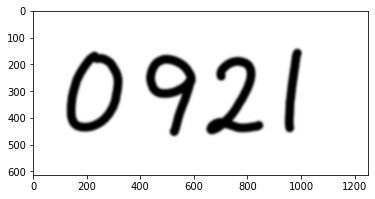

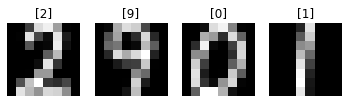

In [ ]:
import img2data

img_path = '0458.png'
image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (8,8), reshape=True)
for i, n in enumerate(numbers):
    n = n/n.max() * 16 # 0~255 구간을 0~16구간으로 변경
    pred = model.predict(n)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")